In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [8]:
def SusukiTrotter():
  #Condiciones de frontera de iteración y pasos
  ti=0
  tf=200
  dt=0.0000001
  pasos = (tf-ti)/dt
  pasos = int(pasos)


  #Declaración
  P1=[]
  P2=[]
  Q1=[]
  Q2=[]
  t=[]

  #Valores iniciales
  P1.append(0)
  P2.append(0)
  Momento=np.array([0,0])
  Q1.append(2)
  Q2.append(1)
  Posicion=np.array([2,1])
  t.append(ti)

  #Iteración Suzuki-Trotter
  for j in range (0, pasos):
    ti=ti+dt
    t.append(ti)
    Momento1=Momento[0]-dt*Posicion[0]*Posicion[1]**2
    Momento2=Momento[1]-dt*Posicion[1]*Posicion[0]**2
    Posicion1=dt*Momento[0]-dt**2*Posicion[0]*Posicion[1]**2+Posicion[0]
    Posicion2=dt*Momento[1]-dt**2*Posicion[1]*Posicion[0]**2+Posicion[1]

    P1.append(Momento1)
    P2.append(Momento2)
    Momento=np.array([Momento1,Momento2])
    Q1.append(Posicion1)
    Q2.append(Posicion2)
    Posicion=np.array([Posicion1,Posicion2])

  #Hiperbolas
  x1 = np.linspace(-6, -0.01, 400)
  x2 = np.linspace(0.01, 6, 400)
  y1 = 2 / x1
  y2 = -2 / x1
  y3 = 2 / x2
  y4 = -2 / x2

  #Graficas
  plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
  plt.plot(Q1, Q2, color='#997BF6', linewidth=1, label="Susuki-Trotter")
  plt.plot(x1, y1, linestyle='--', color='#00CED1')
  plt.plot(x1, y2, linestyle='--', color='#00CED1')
  plt.plot(x2, -y3, linestyle='--', color='#00CED1')
  plt.plot(x2, -y4, linestyle='--', color='#00CED1')
  plt.ticklabel_format(style='plain', axis='y')
  plt.ylim(-6, 6)
  plt.yticks(np.arange(-6, 6.5, 2))
  plt.xlim(-6, 6)
  plt.xticks(np.arange(-6, 6.5, 2))
  plt.legend()
  plt.xlabel('q1')
  plt.ylabel('q2')

  plt.grid()
  plt.show()
    
SusukiTrotter()

In [ ]:
SusukiTrotter()

In [4]:
def SusukiTrotterEnergia():
  #Condiciones de frontera de iteración y pasos
  ti=0
  tf=900
  dt=0.001
  pasos = (tf-ti)/dt
  pasos = int(pasos)


  #Declaración
  P1=[]
  P2=[]
  Q1=[]
  Q2=[]
  E=[]
  t=[]

  #Valores iniciales
  P1.append(0)
  P2.append(0)
  Momento=np.array([0,0])
  Q1.append(2)
  Q2.append(1)
  Posicion=np.array([2,1])
  E.append(2)
  t.append(ti)

  #Iteración Suzuki-Trotter
  for j in range (0, pasos):
    ti=ti+dt
    t.append(ti)
    Momento1=Momento[0]-dt*Posicion[0]*Posicion[1]**2
    Momento2=Momento[1]-dt*Posicion[1]*Posicion[0]**2
    Posicion1=dt*Momento[0]-dt**2*Posicion[0]*Posicion[1]**2+Posicion[0]
    Posicion2=dt*Momento[1]-dt**2*Posicion[1]*Posicion[0]**2+Posicion[1]

    Energy=1/2*(Momento1**2+Momento2**2)+1/2*Posicion1**2*Posicion2**2

    E.append(Energy)
    P1.append(Momento1)
    P2.append(Momento2)
    Momento=np.array([Momento1,Momento2])
    Q1.append(Posicion1)
    Q2.append(Posicion2)
    Posicion=np.array([Posicion1,Posicion2])

  #Grafica

  x = t[::1000]
  y = E[::1000]
  plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
  plt.plot(x, y, color='#000000', linestyle='--', linewidth=1)
  plt.ticklabel_format(style='plain', axis='y')
  #plt.ylim(1.996, 2.004)
  #plt.yticks(np.arange(1.996, 2.0042, 0.001))
  plt.ylim(1.99, 2.01)
  plt.yticks(np.arange(1.99, 2.012, 0.005))
  plt.xlim(700, 900)
  plt.xticks(np.arange(700, 920, 50))
  plt.xlabel('Time')
  plt.ylabel('Energy')

  plt.grid()
  plt.show()

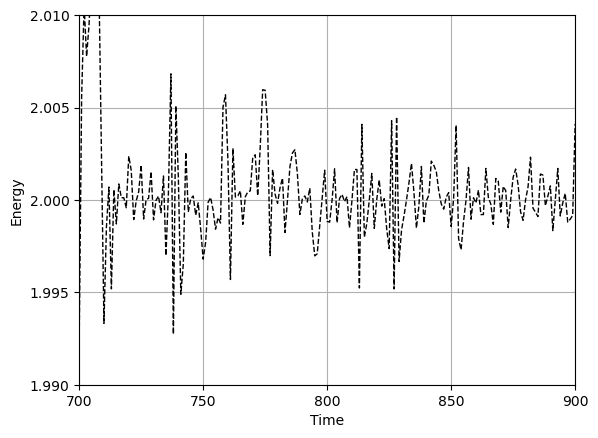

In [5]:
SusukiTrotterEnergia()

In [6]:
def Serie():
  #Condiciones de frontera de iteración y pasos
  ti=0
  tf=200
  dt=0.00005
  pasos = (tf-ti)/dt
  pasos = int(pasos)


  #Declaración
  P1=[]
  P2=[]
  Q1=[]
  Q2=[]
  E=[]
  t=[]

  #Valores iniciales
  P1.append(0)
  P2.append(0)
  Momento=np.array([0,0])
  Q1.append(2)
  Q2.append(1)
  Posicion=np.array([2,1])
  E.append(2)
  t.append(ti)

  #Iteración Suzuki-Trotter
  for j in range (0, pasos):
    ti=ti+dt
    t.append(ti)
    Momento1=Momento[0]-dt*Posicion[0]*Posicion[1]**2
    Momento2=Momento[1]-dt*Posicion[1]*Posicion[0]**2
    Posicion1=dt*Momento[0]+Posicion[0]
    Posicion2=dt*Momento[1]+Posicion[1]

    Energy=0.5*(Momento1**2+Momento2**2)+0.5*Posicion1**2*Posicion2**2

    E.append(Energy)
    P1.append(Momento1)
    P2.append(Momento2)
    Momento=np.array([Momento1,Momento2])
    Q1.append(Posicion1)
    Q2.append(Posicion2)
    Posicion=np.array([Posicion1,Posicion2])


  #Grafica
  plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
  plt.plot(t, E, color='#000000', linewidth=1)
  plt.ticklabel_format(style='plain', axis='y')
  plt.ylim(0, 8)
  plt.yticks(np.arange(0, 8.2, 1))
  plt.xlim(0, 200)
  plt.xticks(np.arange(0, 220, 50))
  plt.xlabel('Time')
  plt.ylabel('Energy')

  plt.grid()
  plt.show()

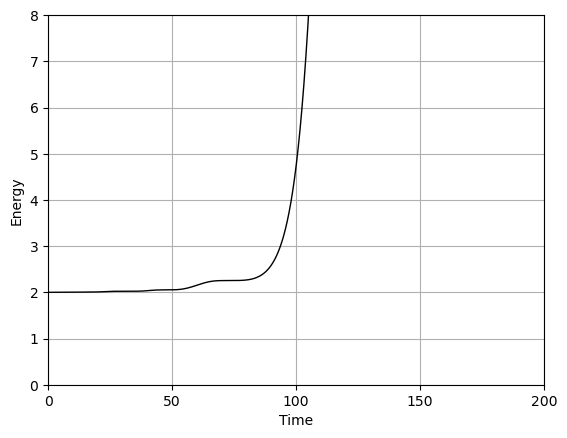

In [7]:
Serie()